# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [3]:
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, roc_auc_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [7]:
# Load the Data Set
filename = os.path.join(os.getcwd(), "data", "/Users/itsrayray3002/Documents/GitHub/Machine-Learning-project/adultData.csv")
df = pd.read_csv(filename, header=0)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind.

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [8]:
# Data Preprocessing
df['age'].fillna(df['age'].median(), inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].median(), inplace=True)
categorical_cols = ['workclass', 'occupation', 'native-country', 'race']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


In [9]:

# Handle outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(zscore(df[numeric_cols]))
outlier_threshold = 3
outliers = np.where(z_scores > outlier_threshold)
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])


In [10]:
# Balance classes for Race
majority_race = df[df['race'] == 'White']
minority_races = df[df['race'] != 'White']
upsampled_minority_races = []
for minority_race_value in minority_races['race'].unique():
    minority_race_data = minority_races[minority_races['race'] == minority_race_value]
    minority_upsampled = resample(minority_race_data, replace=True, n_samples=len(majority_race), random_state=42)
    upsampled_minority_races.append(minority_upsampled)
df = pd.concat([majority_race] + upsampled_minority_races)
df = df.sample(frac=1, random_state=42)  # Shuffle the balanced dataset


In [11]:
# Balance classes for Gender
majority_gender = df[df['sex_selfID'] == 'Non-Female']
minority_gender = df[df['sex_selfID'] == 'Female']
minority_upsampled_gender = resample(minority_gender, replace=True, n_samples=len(majority_gender), random_state=42)
df = pd.concat([majority_gender, minority_upsampled_gender])
df = df.sample(frac=1, random_state=42)  # Shuffle the balanced dataset

In [12]:
# One-hot encode categorical data
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex_selfID', 'native-country', 'income_binary', 'race']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df_encoded

# Display columns of the balanced DataFrame
print(df.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

Empty DataFrame
Columns: []
Index: [29158, 291, 9583, 2611, 19137]
Initial Model Accuracy: 0.98
Top features: ['age', 'fnlwgt', 'capital-gain', 'marital-status_Married-civ-spouse', 'education-num']
Final Model Accuracy: 0.98


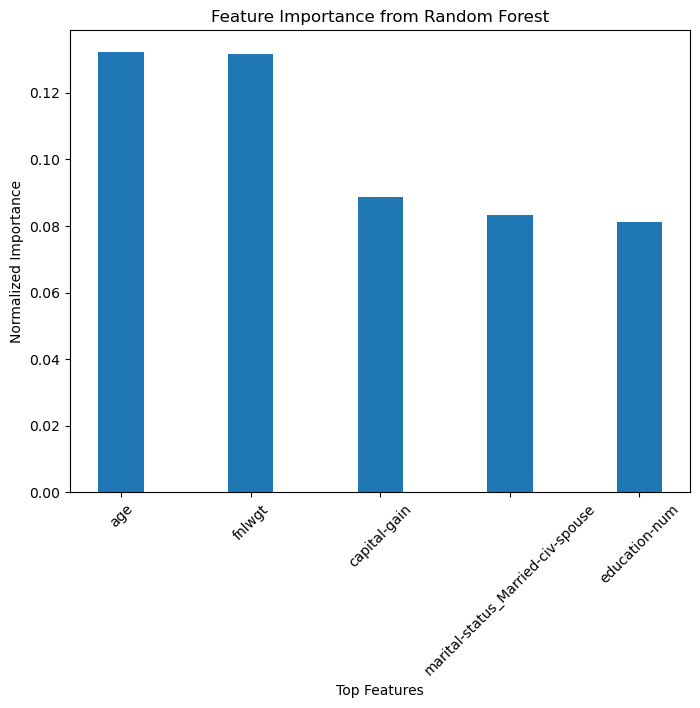

In [13]:

# Step 1: Prepare the data
X = df.drop('income_binary_>50K', axis=1)  # Features
y = df['income_binary_>50K']  # Target variable

# Verify if any non-numeric data exists in X
print(X.select_dtypes(include=[object]).head())

# Convert any remaining object types to numerical (if any)
# You can skip this if there are no object types left
for col in X.select_dtypes(include=[object]).columns:
    X[col] = X[col].astype('category').cat.codes

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# Step 3: Train the initial model (Random Forest)
initial_model = RandomForestClassifier(random_state=42)
initial_model.fit(X_train, y_train)

# Step 4: Evaluate the initial model
initial_accuracy = initial_model.score(X_test, y_test)
print(f"Initial Model Accuracy: {initial_accuracy:.2f}")

# Step 5: Get feature importance
feature_importance = initial_model.feature_importances_

# Step 6: Create a DataFrame with feature names and scores
df_feature_importance = pd.DataFrame({
    'feature_name': X_train.columns.values,
    'importance': feature_importance
})

# Step 7: Sort the features by importance in descending order
df_sorted_importance = df_feature_importance.sort_values('importance', ascending=False)

# Step 8: Get the top 5 sorted feature names
top_features = list(df_sorted_importance['feature_name'].iloc[:5])
print('Top features:', top_features)

# Step 9: Visualize feature importance
plt.figure(figsize=(8, 6))
plt.bar(np.arange(5), sorted(initial_model.feature_importances_, reverse=True)[:5], width=0.35)
plt.xticks(np.arange(5), top_features, rotation=45)
plt.title('Feature Importance from Random Forest')
plt.ylabel('Normalized Importance')
plt.xlabel('Top Features')

# Step 10: Fine-tune hyperparameters using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(initial_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Step 11: Evaluate the final model
final_accuracy = best_model.score(X_test, y_test)
print(f"Final Model Accuracy: {final_accuracy:.2f}")

# Step 12: Plot the ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)

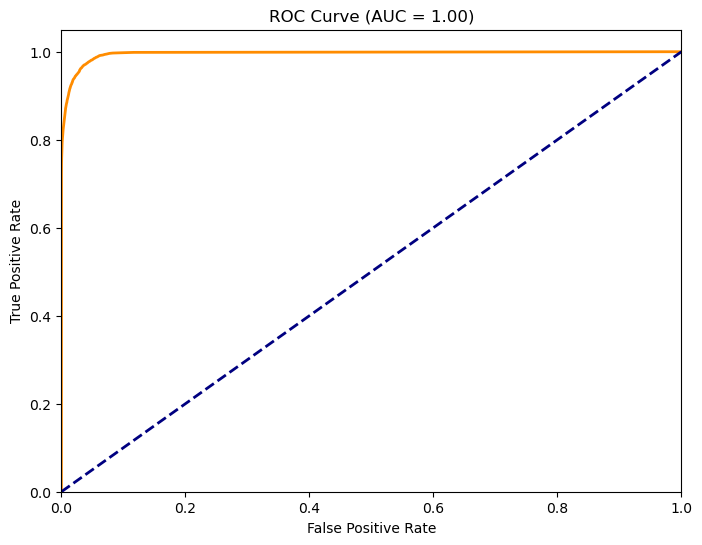

Done


In [14]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()
print("Done")
